In [1]:
#our imports
import matplotlib
import pyart
from copy import deepcopy
import netCDF4
from matplotlib import pyplot as plt
import numpy as np
from __future__ import print_function
#import skfuzzy as fuzz
from scipy import ndimage
%matplotlib inline

In [2]:
filename = '/data/sample_sapr_data/nsaxsapr/BRW120623074931.RAWAFL4'
#'/data/sample_sapr_data/nsaxsapr/BRW111010043552.RAWYL7Y'
radar = pyart.io.read(filename)

In [3]:
print(radar.scan_type)
print(radar.fields.keys())
print(radar.instrument_parameters['nyquist_velocity'])

ppi
['corrected_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'spectrum_width', 'total_power', 'reflectivity', 'differential_reflectivity', 'specific_differential_phase', 'velocity', 'corrected_differential_reflectivity']
{'units': 'meters_per_second', 'meta_group': 'instrument_parameters', 'data': array([ 17.82500076,  17.82500076,  17.82500076, ...,  17.82500076,
        17.82500076,  17.82500076], dtype=float32), 'comments': 'Unambiguous velocity', 'long_name': 'Nyquist velocity'}


In [4]:
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar)
radar.add_field('SNR', snr, replace_existing = True)

In [11]:
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_below('SNR', 5)
gatefilter.exclude_invalid('velocity')



In [12]:
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, gatefilter = gatefilter)
radar.add_field('corrected_velocity', corr_vel, True)


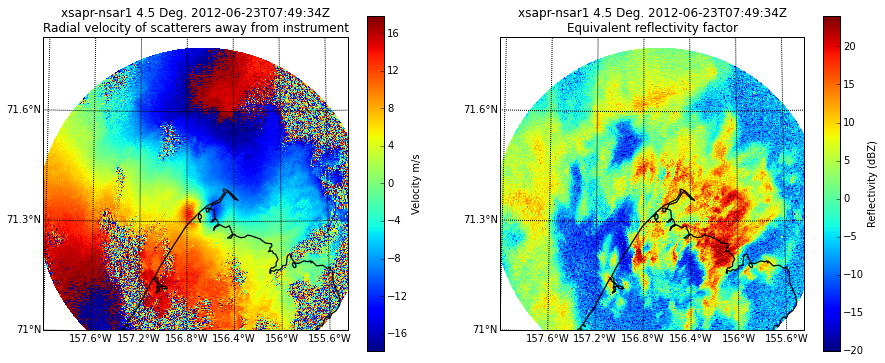

In [17]:
min_lon=-158.0
max_lon=-155.4
min_lat=71.0
max_lat=71.8
lon_lines=np.arange(min_lon, max_lon, 0.4)
lat_lines=np.arange(min_lat, max_lat, 0.3)

#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar)
#create a Matplotlib figure
f = plt.figure(figsize = [15,6])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
plt.subplot(1,2,1)
display.plot_ppi_map('velocity', sweep = 5, vmin = -17.81999969, vmax = 17.81999969,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'h', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='Velocity m/s')

plt.subplot(1,2,2)
display.plot_ppi_map('reflectivity', sweep = 5, vmin = -20, vmax = 24,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'h', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='Reflectivity (dBZ)')



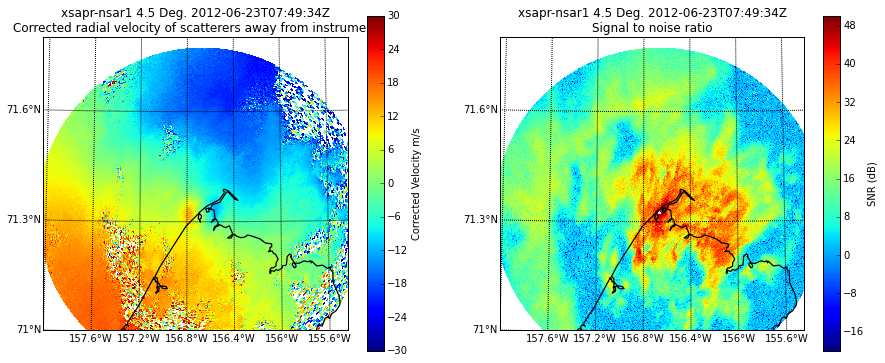

In [16]:
min_lon=-158.0
max_lon=-155.4
min_lat=71.0
max_lat=71.8
lon_lines=np.arange(min_lon, max_lon, 0.4)
lat_lines=np.arange(min_lat, max_lat, 0.3)

#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar)
#create a Matplotlib figure
f = plt.figure(figsize = [15,6])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
plt.subplot(1,2,1)
display.plot_ppi_map('corrected_velocity', sweep = 5, vmin = -30., vmax = 30,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'h', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='Corrected Velocity m/s')

plt.subplot(1,2,2)
display.plot_ppi_map('SNR', sweep = 5, vmin = -20, vmax = 50,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'h', lat_lines = lat_lines, 
                     lon_lines = lon_lines, colorbar_label='SNR (dB)')

